In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [3]:
data_loc = '../dataset/'
decklist = os.listdir(data_loc)

In [5]:
cardlist=[]
for i in os.listdir(data_loc+'card_deck1'):
    cardlist.append(i[:-4])
print(np.array(cardlist))

['C10' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'CA' 'CJ' 'CK' 'CQ' 'D10'
 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'DA' 'DJ' 'DK' 'DQ' 'H10' 'H2'
 'H3' 'H4' 'H5' 'H6' 'H7' 'H8' 'H9' 'HA' 'HJ' 'HK' 'HQ' 'S10' 'S2' 'S3'
 'S4' 'S5' 'S6' 'S7' 'S8' 'S9' 'SA' 'SJ' 'SK' 'SQ']


In [7]:
imglist = []
for j in cardlist:
    for i in decklist:
        tmpimg = cv2.imread(data_loc+i+'/'+j+'.jpg', cv2.IMREAD_GRAYSCALE)
        #tmpimg = cv2.resize(tmpimg, (100, 100), interpolation=cv2.INTER_AREA)
        imglist.append(tmpimg)
print(len(imglist))
print(imglist[0].shape)

260
(120, 100)


In [27]:
labellist=[]
for i in cardlist:
    for j in range(5):
        name = str(j+1)+'_'+str(i)
        labellist.append(name)
print(np.array(labellist))

['1_C10' '2_C10' '3_C10' '4_C10' '5_C10' '1_C2' '2_C2' '3_C2' '4_C2'
 '5_C2' '1_C3' '2_C3' '3_C3' '4_C3' '5_C3' '1_C4' '2_C4' '3_C4' '4_C4'
 '5_C4' '1_C5' '2_C5' '3_C5' '4_C5' '5_C5' '1_C6' '2_C6' '3_C6' '4_C6'
 '5_C6' '1_C7' '2_C7' '3_C7' '4_C7' '5_C7' '1_C8' '2_C8' '3_C8' '4_C8'
 '5_C8' '1_C9' '2_C9' '3_C9' '4_C9' '5_C9' '1_CA' '2_CA' '3_CA' '4_CA'
 '5_CA' '1_CJ' '2_CJ' '3_CJ' '4_CJ' '5_CJ' '1_CK' '2_CK' '3_CK' '4_CK'
 '5_CK' '1_CQ' '2_CQ' '3_CQ' '4_CQ' '5_CQ' '1_D10' '2_D10' '3_D10' '4_D10'
 '5_D10' '1_D2' '2_D2' '3_D2' '4_D2' '5_D2' '1_D3' '2_D3' '3_D3' '4_D3'
 '5_D3' '1_D4' '2_D4' '3_D4' '4_D4' '5_D4' '1_D5' '2_D5' '3_D5' '4_D5'
 '5_D5' '1_D6' '2_D6' '3_D6' '4_D6' '5_D6' '1_D7' '2_D7' '3_D7' '4_D7'
 '5_D7' '1_D8' '2_D8' '3_D8' '4_D8' '5_D8' '1_D9' '2_D9' '3_D9' '4_D9'
 '5_D9' '1_DA' '2_DA' '3_DA' '4_DA' '5_DA' '1_DJ' '2_DJ' '3_DJ' '4_DJ'
 '5_DJ' '1_DK' '2_DK' '3_DK' '4_DK' '5_DK' '1_DQ' '2_DQ' '3_DQ' '4_DQ'
 '5_DQ' '1_H10' '2_H10' '3_H10' '4_H10' '5_H10' '1_H2' '2_H2' '3_H2'
 '4_H

In [22]:
labellist_shape = [name[2]for name in labellist]
labellist_num = [name[3:]for name in labellist]

In [26]:
decklist

['card_deck1', 'card_deck2', 'card_deck3', 'card_deck4', 'card_deck5']

#######################################

In [63]:
X_train = []
y_train = []
for j in cardlist:
    for i in decklist[:4]:
        tmpimg = cv2.imread(data_loc+i+'/'+j+'.jpg', cv2.IMREAD_GRAYSCALE)
        tmpimg = np.reshape(tmpimg,(-1,))
        X_train.append(tmpimg)
        y_train.append(str(j))

In [64]:
X_test = [] 
y_test = []

for j in cardlist:
    tmpimg = cv2.imread(data_loc+decklist[4]+'/'+j+'.jpg', cv2.IMREAD_GRAYSCALE)
    tmpimg = np.reshape(tmpimg,(-1,))
    X_test.append(tmpimg)
    y_test.append(str(j))

In [77]:
y_train_shape = [name[0]for name in y_train]
y_train_num = [name[1:]for name in y_train]

y_test_shape = [name[0]for name in y_test]
y_test_num = [name[1:]for name in y_test]

In [78]:
len(X_test)

52

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
from sklearn import tree

In [113]:
dt_clf = DecisionTreeClassifier()

In [115]:
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)
len(dt_prediction[dt_prediction == y_test])

4

In [85]:
dt_clf = dt_clf.fit(X_train, y_train_num)
dt_prediction = dt_clf.predict(X_test)
len(dt_prediction[dt_prediction == y_test_num])

39

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)


c:\users\ohohk\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ohohk\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\ohohk\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\ohohk\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set 

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                             

In [126]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


c:\users\ohohk\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ohohk\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression 0.07692307692307693
RandomForestClassifier 0.019230769230769232


c:\users\ohohk\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\ohohk\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.019230769230769232


c:\users\ohohk\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ohohk\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\ohohk\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.038461538461538464


In [88]:
decklist

['card_deck1', 'card_deck2', 'card_deck3', 'card_deck4', 'card_deck5']

In [91]:
a= np.zeros((3,2,1))

In [92]:
a[0].shape

(2, 1)

In [100]:
a[0][:] = np.array((2,1))

ValueError: could not broadcast input array from shape (2) into shape (2,1)

In [101]:
imgary[0]

260

In [121]:
data_loc = '../dataset/'
decklist = os.listdir(data_loc)
filelist = os.listdir(data_loc+decklist[0]+'/')

length = len(decklist)*len(filelist)
imgary = np.zeros((length, 120*100))
labels = []
n=0
for i in decklist:
    for j in filelist:
        tmpimg = cv2.imread(data_loc+i+'/'+j, cv2.IMREAD_GRAYSCALE)
        tmpimg = np.reshape(tmpimg, (-1,))
        imgary[n] = tmpimg
        labels.append(j)
        n+=1

In [32]:
imgary

array([[255., 189., 160., ..., 158., 190., 254.],
       [254., 190., 162., ..., 157., 191., 255.],
       [255., 190., 159., ..., 157., 191., 255.],
       ...,
       [255., 255., 181., ...,  51., 196., 253.],
       [255., 254., 183., ...,  51., 197., 254.],
       [255., 254., 182., ...,  51., 197., 254.]])

In [33]:
imgary.shape

(260, 12000)

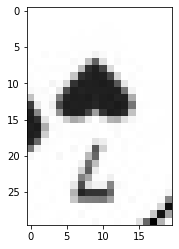

In [70]:
img = imgary[240].reshape(120,100)
plt.imshow(img[90:120, 80:100], cmap='gray')

In [47]:
label_shape=[label[0] for label in labels]
label_num = [label[1:-4] for label in labels]

In [48]:
label_num

['10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'J',
 'K',
 'Q',
 '10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'J',
 'K',
 'Q',
 '10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'J',
 'K',
 'Q',
 '10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'J',
 'K',
 'Q',
 '10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'J',
 'K',
 'Q',
 '10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'J',
 'K',
 'Q',
 '10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'J',
 'K',
 'Q',
 '10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'J',
 'K',
 'Q',
 '10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'J',
 'K',
 'Q',
 '10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'J',
 'K',
 'Q',
 '10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'J',
 'K',
 'Q',
 '10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'J',
 'K',
 'Q',
 '10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9

In [88]:
imgary_some=np.zeros((imgary.shape[0],30*20))
i=0
for img in imgary: 
    img = img.reshape(120,100)
    imgg = img[90:120, 80:100]
    imgg = imgg.reshape(-1,)
    imgary_some[i] = imgg
    i+=1

In [89]:
imgary_some

array([[254., 255., 252., ..., 158., 190., 254.],
       [254., 255., 252., ..., 157., 191., 255.],
       [254., 255., 252., ..., 157., 191., 255.],
       ...,
       [253., 255., 254., ...,  51., 196., 253.],
       [252., 254., 253., ...,  51., 197., 254.],
       [255., 254., 254., ...,  51., 197., 254.]])

In [90]:
imgary_some.shape

(260, 600)

In [95]:
label

'C10.jpg'

In [120]:
X_train = imgary_some[:208]
y_train = labels[:208]
X_test = imgary_some[208:]
y_test = labels[208:]

In [94]:
X_test

array([[255., 255., 255., ...,  51., 197., 255.],
       [255., 255., 255., ...,  51., 196., 253.],
       [255., 255., 255., ...,  52., 197., 254.],
       ...,
       [253., 255., 254., ...,  51., 196., 253.],
       [252., 254., 253., ...,  51., 197., 254.],
       [255., 254., 254., ...,  51., 197., 254.]])

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

tree = DecisionTreeRegressor().fit(X_train, y_train)

ValueError: could not convert string to float: 'A'